### **Gradient Descent (GD)**

- **Uses the entire dataset to compute the gradient.**
- **Update Rule**:  

$$
\theta = \theta - \eta \cdot \nabla J(\theta)
$$


---

### **Adam Optimizer**

- **Combines momentum and RMSProp.**
- **Update Rules**:

Momentum term:  
$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) \cdot g_t
$$  

RMSProp term:  
$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) \cdot g_t^2
$$  

Bias-corrected estimates:  
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$  

Parameter update:  
$$
\theta = \theta - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t
$$  

---

These are the basic equations for Implementing Gradient Descent and Adam optimiser from scratch. 
---

### **Step 1: Generating Random Dataset**

In this section, we generate a random dataset for a simple linear regression problem. The true model is $( y = 2x + \text{noise} )$, where noise is uniformly distributed random noise.

In [4]:
import random

# Generate random dataset
random.seed(42)
n_samples = 100
X = [random.uniform(0, 10) for _ in range(n_samples)]
y = [2 * x + random.uniform(-1, 1) for x in X]  # True model: y = 2x + noise


### **Step 2: Cost Function and Gradient Computation**

The cost function for linear regression is the Mean Squared Error (MSE):


$J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2$

where:
- $( h_\theta(x) = \theta_0 + \theta_1x )$ is the hypothesis.

The gradient is computed as:

$$
\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right)
$$

$$
\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^m \left( \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)} \right)
$$


In [5]:
# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(X)
    return sum((theta[0] + theta[1] * X[i] - y[i])**2 for i in range(m)) / (2 * m)

# Gradient computation
def compute_gradient(X, y, theta):
    m = len(X)
    grad_0 = sum(theta[0] + theta[1] * X[i] - y[i] for i in range(m)) / m
    grad_1 = sum((theta[0] + theta[1] * X[i] - y[i]) * X[i] for i in range(m)) / m
    return [grad_0, grad_1]


### **Step 3: Gradient Descent Implementation**

Gradient Descent updates the parameters \( \theta \) using the rule:

$$
\theta_j := \theta_j - \eta \cdot \frac{\partial J}{\partial \theta_j}
$$

where $( \eta )$ is the learning rate.

In [6]:
# Gradient Descent
def gradient_descent(X, y, learning_rate, iterations):
    theta = [0, 0]  # Initial parameters
    cost_history = []
    for _ in range(iterations):
        grad = compute_gradient(X, y, theta)
        theta[0] -= learning_rate * grad[0]
        theta[1] -= learning_rate * grad[1]
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history


### **Step 4: Adam Optimizer Implementation**

Adam combines momentum and RMSProp to adapt the learning rate for each parameter:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t, \quad v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$$

Bias correction terms:
$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

Parameter update:
$$
\theta = \theta - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t
$$

In [7]:
# Adam Optimizer
def adam_optimizer(X, y, learning_rate, iterations, beta1, beta2, epsilon):
    theta = [0, 0]  # Initial parameters
    m_t = [0, 0]
    v_t = [0, 0]
    cost_history = []
    for t in range(1, iterations + 1):
        grad = compute_gradient(X, y, theta)
        m_t = [beta1 * m_t[i] + (1 - beta1) * grad[i] for i in range(2)]
        v_t = [beta2 * v_t[i] + (1 - beta2) * (grad[i]**2) for i in range(2)]
        m_hat = [m_t[i] / (1 - beta1**t) for i in range(2)]
        v_hat = [v_t[i] / (1 - beta2**t) for i in range(2)]
        theta = [theta[i] - learning_rate * m_hat[i] / (v_hat[i]**0.5 + epsilon) for i in range(2)]
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history


### **Step 5: Running the Optimizers**
Here we run both Gradient Descent and Adam Optimizer, comparing their performance in terms of parameter convergence and cost function reduction.

In [8]:
# Running the optimizers
learning_rate = 0.01
iterations = 1000
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

gd_theta, gd_cost = gradient_descent(X, y, learning_rate, iterations)
adam_theta, adam_cost = adam_optimizer(X, y, learning_rate, iterations, beta1, beta2, epsilon)


### **Step 6: Visualization of Cost vs Iterations**
We compare the convergence of the cost function for Gradient Descent and Adam Optimizer using a line plot.

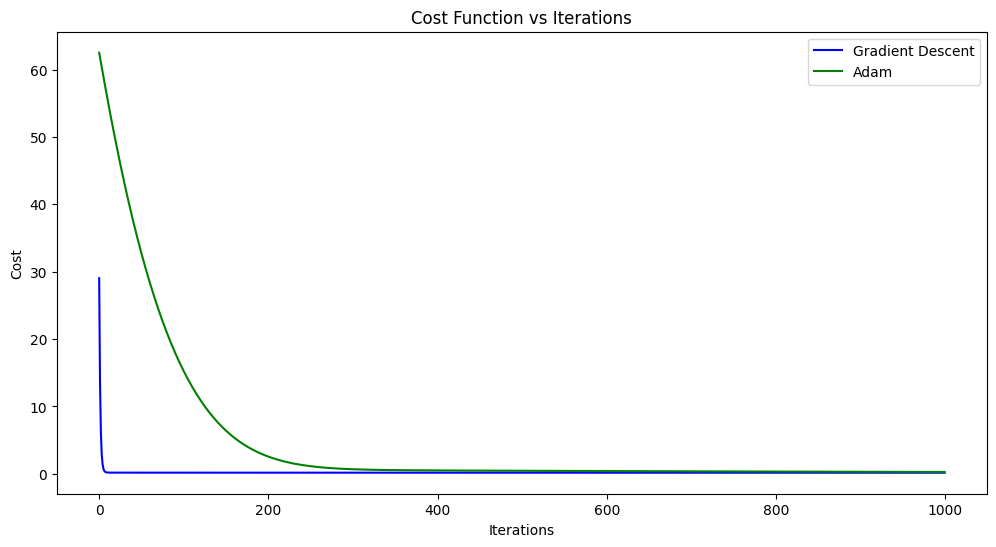

GD Final Parameters: [-0.01076304692121362, 1.9988885796651275]
Adam Final Parameters: [0.8451781874976259, 1.8620127695528423]


In [9]:
# Plotting results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(gd_cost, label="Gradient Descent", color='blue')
plt.plot(adam_cost, label="Adam", color='green')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs Iterations")
plt.legend()
plt.show()

# Display final parameters
print(f"GD Final Parameters: {gd_theta}")
print(f"Adam Final Parameters: {adam_theta}")


### **Step 7: Visualizing Data and Predictions**
We visualize the dataset along with the predictions from both optimizers to compare how well they fit the data.

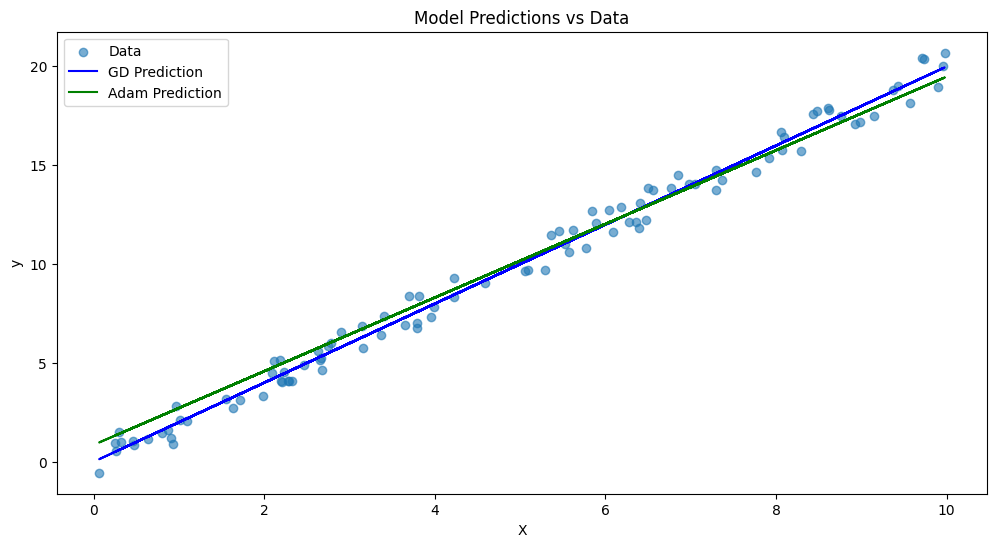

In [10]:
# Visualize predictions
y_pred_gd = [gd_theta[0] + gd_theta[1] * x for x in X]
y_pred_adam = [adam_theta[0] + adam_theta[1] * x for x in X]

plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Data", alpha=0.6)
plt.plot(X, y_pred_gd, label="GD Prediction", color='blue')
plt.plot(X, y_pred_adam, label="Adam Prediction", color='green')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Model Predictions vs Data")
plt.legend()
plt.show()


### **Step 8: Calculating Performance Metrics**

The formulas for the performance metrics are as follows:

1. **Mean Absolute Error (MAE)**:
   $$
   MAE = \frac{1}{m} \sum_{i=1}^m \left| y^{(i)} - \hat{y}^{(i)} \right|
   $$

2. **Coefficient of Determination (\(R^2\))**:
   $$
   R^2 = 1 - \frac{\sum_{i=1}^m (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i=1}^m (y^{(i)} - \bar{y})^2}
   $$
   where $( \bar{y} )$ is the mean of the true $(y)$-values.

In [11]:
# Performance Metrics
def calculate_metrics(y_true, y_pred):
    # Mean Absolute Error
    mae = sum(abs(y_true[i] - y_pred[i]) for i in range(len(y_true))) / len(y_true)
    
    # R^2 Score
    y_mean = sum(y_true) / len(y_true)
    ss_total = sum((y - y_mean)**2 for y in y_true)
    ss_residual = sum((y_true[i] - y_pred[i])**2 for i in range(len(y_true)))
    r2 = 1 - (ss_residual / ss_total)
    
    return mae, r2

# Predictions
y_pred_gd = [gd_theta[0] + gd_theta[1] * x for x in X]
y_pred_adam = [adam_theta[0] + adam_theta[1] * x for x in X]

# Metrics for GD
gd_mae, gd_r2 = calculate_metrics(y, y_pred_gd)

# Metrics for Adam
adam_mae, adam_r2 = calculate_metrics(y, y_pred_adam)

print(f"Gradient Descent - MAE: {gd_mae:.4f}, R^2: {gd_r2:.4f}")
print(f"Adam Optimizer - MAE: {adam_mae:.4f}, R^2: {adam_r2:.4f}")


Gradient Descent - MAE: 0.5043, R^2: 0.9902
Adam Optimizer - MAE: 0.6516, R^2: 0.9842


### **Final Visualization**

We can add another visualization to compare the residuals for both optimizers. Residuals are the differences between true $(y)$-values and predicted $(y)$-values.

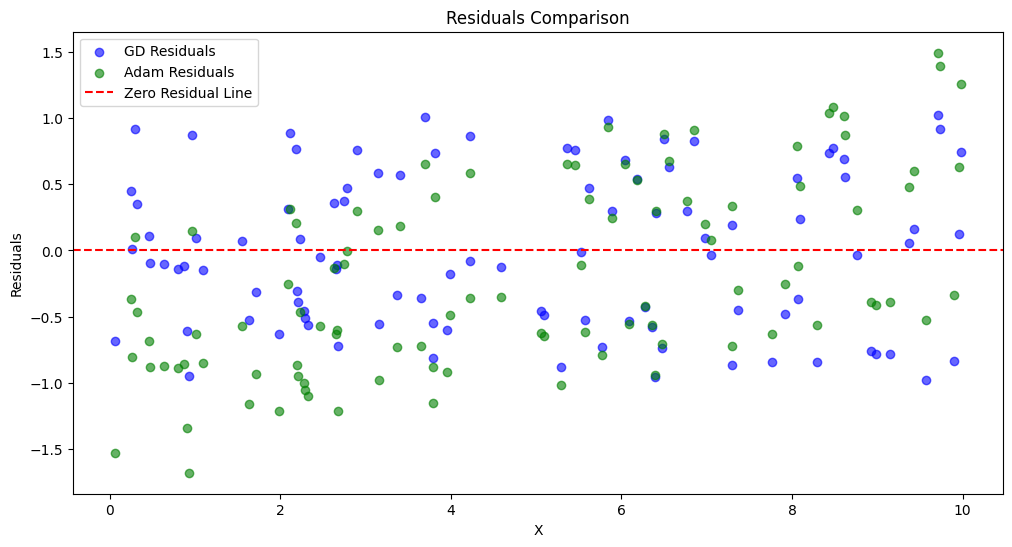

In [12]:
# Residual Plot
gd_residuals = [y[i] - y_pred_gd[i] for i in range(len(y))]
adam_residuals = [y[i] - y_pred_adam[i] for i in range(len(y))]

plt.figure(figsize=(12, 6))
plt.scatter(X, gd_residuals, label="GD Residuals", alpha=0.6, color='blue')
plt.scatter(X, adam_residuals, label="Adam Residuals", alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--', label="Zero Residual Line")
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Comparison")
plt.legend()
plt.show()


# Conclusion: Gradient Descent vs. Adam Optimizer

In this experiment, we compared the performance of **Gradient Descent (GD)** and the **Adam Optimizer** on a simple linear regression problem. The results showed that **Gradient Descent outperformed Adam** in terms of Mean Absolute Error (MAE) and \( R^2 \) score, which quantify the predictive performance of the models. Below, we discuss the reasons for this result, insights from the metrics, and broader implications.

---

## Key Observations:
1. **Gradient Descent Performance**:
   - Achieved lower MAE ($0.5043$) and higher $R^2$ ($0.9902$), indicating a better fit to the data.
   - Converged effectively to the global minimum of the cost function due to the problem's convexity and simplicity.

2. **Adam Optimizer Performance**:
   - While Adam also converged, its MAE was higher ($0.6516$) and $R^2$ slightly lower ($0.9842$).
   - This suggests that the additional computations for momentum and adaptive learning rate adjustment were unnecessary for this simple, smooth loss landscape.

---

## Why Gradient Descent Outperformed Adam:
1. **Simplicity of the Problem**:
   - The dataset and cost function (Mean Squared Error) are smooth and convex, making them ideal for basic Gradient Descent without requiring adaptive learning rates.

2. **Adam's Overhead**:
   - Adam introduces momentum and learning rate adjustments, which are beneficial for complex, high-dimensional, and noisy problems. However, these adjustments may have caused slight overcorrections or inefficiencies in this simple scenario.

3. **Learning Rate Stability**:
   - Gradient Descent used a fixed learning rate ($\eta = 0.01$), which effectively navigated the cost surface. Adam's dynamic adjustments may have introduced minor oscillations or slower convergence in this specific case.

4. **Effect of Noise**:
   - The small noise added to the dataset ($y = 2x + \text{noise}$) may have led Adam's adaptive mechanisms to react more to local variations in gradients, whereas Gradient Descent averaged out the noise more effectively.

---

## Insights from Metrics:
- **MAE (Mean Absolute Error)**:
  - GD: $0.5043$ | Adam: $0.6516$
  - Gradient Descent produced predictions closer to the true values, reflecting its better fit to the data.

- **$R^2$ Score**:
  - GD: $0.9902$ | Adam: $0.9842$
  - Both optimizers explained most of the variance in the dataset, but GD captured slightly more due to its simpler optimization process.

---

## Broader Implications:
This experiment highlights that **Gradient Descent can outperform advanced optimizers like Adam on simple, convex optimization problems**. While Adam is often preferred for training deep neural networks or handling sparse gradients, its additional features can become redundant for basic problems like linear regression.

**Key Takeaway**: The choice of optimizer should depend on the complexity of the problem:
- Use **Gradient Descent** for simple, smooth, convex problems.
- Use **Adam Optimizer** for complex, high-dimensional, non-convex problems, or datasets with noisy or sparse gradients.

---

## Recommendations for Improvement:
1. **Tuning Adam Hyperparameters**:
   - Adjust $\beta_1$, $\beta_2$, and $\epsilon$ to better suit the problem.

2. **Learning Rate Adjustment**:
   - A higher learning rate for Adam ($\eta > 0.01$) might improve its convergence speed and accuracy.

3. **Warm-Up Steps for Adam**:
   - Implementing a learning rate warm-up could allow Adam to stabilize its updates in the initial stages of training.

---

### Final Thoughts:
While Adam is a powerful and widely used optimizer, it is not a one-size-fits-all solution. For simple linear regression problems, traditional Gradient Descent can achieve better results with fewer computations and hyperparameter dependencies. This underscores the importance of understanding the nature of the problem before selecting an optimization algorithm.
